In [1]:
import pandas as pd
import csv
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import joblib

from sklearn.decomposition import PCA
import statsmodels.tools.tools as sm
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# from config import user_name,password

In [2]:
btc = pd.read_csv("../data/BTC-USD.csv")
btc = btc.drop(columns=["Adj Close","Open","High","Low","Volume"])
btc['Date']= pd.to_datetime(btc['Date'])
btc = btc.dropna()
btc_data = btc.iloc[::-1]
# btc_data.head()

In [3]:
btc_data = btc_data.rename(columns={'Close': 'Close_Btc'})
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data['Day_Btc'] = btc_data['Date'].dt.day_name()
btc_data = btc_data.sort_values(by="Date")
# btc_data

In [4]:
btc_data_clean = btc_data.loc[((btc_data['Day_Btc'] != "Saturday") & (btc_data['Day_Btc'] != 'Sunday'))]
# btc_data_clean

In [5]:
btc_data_clean = btc_data_clean.drop(columns=["Day_Btc"])
btc_data_clean["BTC_Change%"] = btc_data_clean["Close_Btc"].pct_change()
btc_data_clean['BTC_Change%_lag'] = btc_data_clean["BTC_Change%"].shift(1)

# Construction direction of BITCOIN movement
btc_data_clean['BTC_dir'] = (btc_data_clean["BTC_Change%"]>0).astype(float)
btc_data_clean['BTC_dir_lag'] = btc_data_clean['BTC_dir'].shift(1)
# btc_data_clean

In [6]:
btc_data_clean.dtypes

Date               datetime64[ns]
Close_Btc                 float64
BTC_Change%               float64
BTC_Change%_lag           float64
BTC_dir                   float64
BTC_dir_lag               float64
dtype: object

In [7]:
eth = pd.read_csv("../data/ETH-USD.csv")
eth = eth.drop(columns=["Adj Close","Open","High","Low","Volume"])
eth['Date']= pd.to_datetime(eth['Date'])
eth_data = eth.dropna()
eth_data = eth_data.iloc[::-1]
# eth_data.head()

In [8]:
eth_data = eth_data.rename(columns={'Close': 'Close_Eth'})
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
eth_data['Day_Eth'] = eth_data['Date'].dt.day_name()
eth_data = eth_data.sort_values(by="Date")
# eth_data

In [9]:
eth_data_clean = eth_data.loc[((eth_data['Day_Eth'] != "Saturday") & (eth_data['Day_Eth'] != 'Sunday'))]
# eth_data_clean

In [10]:
eth_data_clean = eth_data_clean.drop(columns=["Day_Eth"])
eth_data_clean["ETH_Change%"] = eth_data_clean["Close_Eth"].pct_change()
eth_data_clean['ETH_Change%_lag'] = eth_data_clean["ETH_Change%"].shift(1)

# Construction direction of Ethereum movement
eth_data_clean['ETH_dir'] = (eth_data_clean["ETH_Change%"]>0).astype(float)
eth_data_clean['ETH_dir_lag'] = eth_data_clean['ETH_dir'].shift(1)
eth_data_clean.head()

,Date,Close_Eth,ETH_Change%,ETH_Change%_lag,ETH_dir,ETH_dir_lag
2,2016-10-10,11.7555,NaN,NaN,0.0,NaN
3,2016-10-11,11.7857,0.002569,NaN,1.0,0.0
4,2016-10-12,11.9335,0.012541,0.002569,1.0,1.0
5,2016-10-13,11.9630,0.002472,0.012541,1.0,1.0
6,2016-10-14,11.9382,-0.002073,0.002472,0.0,1.0


In [11]:
eth_data_clean.dtypes

Date               datetime64[ns]
Close_Eth                 float64
ETH_Change%               float64
ETH_Change%_lag           float64
ETH_dir                   float64
ETH_dir_lag               float64
dtype: object

In [12]:
gold = pd.read_csv("../data/Gold-Futures.csv")
gold = gold.drop(columns=["Vol.","Change %","Open","High","Low"])
gold['Date']= pd.to_datetime(gold['Date'])
gold_data = gold.dropna()
# gold_data.head()

In [13]:
gold_data = gold_data.rename(columns={'Price': 'Price_Gold'})
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day_Gold'] = gold_data['Date'].dt.day_name()
gold_data = gold_data.sort_values(by="Date")
gold_data = gold_data.reset_index(drop=True)
gold_data['Price_Gold'] = gold_data.Price_Gold.str.replace(',', '').astype(float)
# gold_data

In [14]:
gold_data_clean = gold_data.loc[((gold_data['Day_Gold'] != "Saturday") & (gold_data['Day_Gold'] != 'Sunday'))]
# gold_data_clean

In [15]:
gold_data_clean = gold_data_clean.drop(columns=["Day_Gold"])
gold_data_clean["Gold_Change%"] = gold_data_clean["Price_Gold"].pct_change()
gold_data_clean['Gold_Change%_lag'] = gold_data_clean["Gold_Change%"].shift(1)

# Construction direction of GOLD movement
gold_data_clean['gold_dir'] = (gold_data_clean["Gold_Change%"]>0).astype(float)
gold_data_clean['gold_dir_lag'] = gold_data_clean['gold_dir'].shift(1)
gold_data_clean.head()

,Date,Price_Gold,Gold_Change%,Gold_Change%_lag,gold_dir,gold_dir_lag
0,2016-09-08,1400.2,NaN,NaN,0.0,NaN
1,2016-09-09,1393.1,-0.005071,NaN,0.0,0.0
2,2016-09-12,1384.4,-0.006245,-0.005071,0.0,0.0
3,2016-09-13,1380.8,-0.002600,-0.006245,0.0,0.0
4,2016-09-14,1383.3,0.001811,-0.002600,1.0,0.0


In [16]:
gold_data_clean.dtypes

Date                datetime64[ns]
Price_Gold                 float64
Gold_Change%               float64
Gold_Change%_lag           float64
gold_dir                   float64
gold_dir_lag               float64
dtype: object

In [17]:
snp = pd.read_csv("../data/S&P-500.csv")
snp = snp.drop(columns=["Vol.","Change %","Open","High","Low"])
snp['Date']= pd.to_datetime(snp['Date'])
snp_data = snp.dropna()
# snp_data.head()

In [18]:
snp_data = snp_data.rename(columns={'Price': 'Price_Snp'})
snp_data['Date'] = pd.to_datetime(snp_data['Date'])
snp_data['Day_Snp'] = snp_data['Date'].dt.day_name()
snp_data = snp_data.sort_values(by="Date")
snp_data = snp_data.reset_index(drop=True)
snp_data['Price_Snp'] = snp_data.Price_Snp.str.replace(',', '').astype(float)
# snp_data

In [19]:
snp_data_clean = snp_data.loc[((snp_data['Day_Snp'] != "Saturday") & (snp_data['Day_Snp'] != 'Sunday'))]
# snp_data_clean

In [20]:
snp_data_clean = snp_data_clean.drop(columns=["Day_Snp"])
snp_data_clean["Snp_Change%"] = snp_data_clean["Price_Snp"].pct_change()
snp_data_clean['Snp_Change%_lag'] = snp_data_clean["Snp_Change%"].shift(1)

# Construction direction of S&P movement
snp_data_clean['Snp_dir'] = (snp_data_clean["Snp_Change%"]>0).astype(float)
snp_data_clean['Snp_dir_lag'] = snp_data_clean['Snp_dir'].shift(1)
# snp_data_clean

In [21]:
usbond = pd.read_csv("../data/US-10-Year-Bond.csv")
usbond = usbond.drop(columns=["Change %","Open","High","Low"])
usbond['Date']= pd.to_datetime(usbond['Date'])
usbond_data = usbond.dropna()
# usbond_data.head()

In [22]:
usbond_data = usbond_data.rename(columns={'Price': 'Price_USB'})
usbond_data['Date'] = pd.to_datetime(usbond_data['Date'])
usbond_data['Day_USB'] = usbond_data['Date'].dt.day_name()
usbond_data = usbond_data.sort_values(by="Date")
usbond_data = usbond_data.reset_index(drop=True)
# usbond_data

In [23]:
usbond_data_clean = usbond_data.loc[((usbond_data['Day_USB'] != "Saturday") & (usbond_data['Day_USB'] != 'Sunday'))]
# usbond_data_clean

In [24]:
usbond_data_clean = usbond_data_clean.drop(columns=["Day_USB"])
usbond_data_clean["USB_Change%"] = usbond_data_clean["Price_USB"].pct_change()
usbond_data_clean['USB_Change%_lag'] = usbond_data_clean["USB_Change%"].shift(1)

# Construction direction of US BOND movement
usbond_data_clean['USB_dir'] = (usbond_data_clean["USB_Change%"]>0).astype(float)
usbond_data_clean['USB_dir_lag'] = usbond_data_clean['USB_dir'].shift(1)
# usbond_data_clean

In [25]:
usbond_data_clean.dtypes

Date               datetime64[ns]
Price_USB                 float64
USB_Change%               float64
USB_Change%_lag           float64
USB_dir                   float64
USB_dir_lag               float64
dtype: object

In [26]:
bit_1 = btc_data_clean.merge(eth_data_clean, how='left', on='Date')
# bit_1

In [27]:
bit_2 = bit_1.merge(snp_data_clean, how='left', on='Date')
# bit_2

In [28]:
bit_3 = bit_2.merge(usbond_data_clean, how='left', on='Date')
bit_3.dropna().head()

,Date,Close_Btc,BTC_Change%,BTC_Change%_lag,BTC_dir,BTC_dir_lag,Close_Eth,ETH_Change%,ETH_Change%_lag,ETH_dir,...,Price_Snp,Snp_Change%,Snp_Change%_lag,Snp_dir,Snp_dir_lag,Price_USB,USB_Change%,USB_Change%_lag,USB_dir,USB_dir_lag
2,2016-10-12,636.192017,-0.007612,0.035668,0.0,1.0,11.9335,0.012541,0.002569,1.0,...,2139.18,0.001147,-0.012447,1.0,0.0,1.771,0.002264,0.001133,1.0,1.0
3,2016-10-13,636.786011,0.000934,-0.007612,1.0,0.0,11.9630,0.002472,0.012541,1.0,...,2132.55,-0.003099,0.001147,0.0,1.0,1.746,-0.014116,0.002264,0.0,1.0
4,2016-10-14,640.377991,0.005641,0.000934,1.0,1.0,11.9382,-0.002073,0.002472,0.0,...,2132.98,0.000202,-0.003099,1.0,0.0,1.805,0.033792,-0.014116,1.0,0.0
5,2016-10-17,639.192993,-0.001850,0.005641,0.0,1.0,12.0050,0.005595,-0.002073,1.0,...,2126.50,-0.003038,0.000202,0.0,1.0,1.768,-0.020499,0.033792,0.0,1.0
6,2016-10-18,637.960022,-0.001929,-0.001850,0.0,0.0,12.5885,0.048605,0.005595,1.0,...,2139.60,0.006160,-0.003038,1.0,0.0,1.740,-0.015837,-0.020499,0.0,0.0


In [29]:
# bit_3.dtypes

In [30]:
gold_1 = gold_data_clean.merge(usbond_data_clean, how='left', on='Date')
# gold_1

In [31]:
gold_2 = gold_1.merge(snp_data_clean, how='left', on='Date')
gold_2.head()

,Date,Price_Gold,Gold_Change%,Gold_Change%_lag,gold_dir,gold_dir_lag,Price_USB,USB_Change%,USB_Change%_lag,USB_dir,USB_dir_lag,Price_Snp,Snp_Change%,Snp_Change%_lag,Snp_dir,Snp_dir_lag
0,2016-09-08,1400.2,NaN,NaN,0.0,NaN,1.601,NaN,NaN,0.0,NaN,2181.30,NaN,NaN,0.0,NaN
1,2016-09-09,1393.1,-0.005071,NaN,0.0,0.0,1.675,0.046221,NaN,1.0,0.0,2127.81,-0.024522,NaN,0.0,0.0
2,2016-09-12,1384.4,-0.006245,-0.005071,0.0,0.0,1.666,-0.005373,0.046221,0.0,1.0,2159.04,0.014677,-0.024522,1.0,0.0
3,2016-09-13,1380.8,-0.002600,-0.006245,0.0,0.0,1.729,0.037815,-0.005373,1.0,0.0,2127.02,-0.014831,0.014677,0.0,1.0
4,2016-09-14,1383.3,0.001811,-0.002600,1.0,0.0,1.698,-0.017929,0.037815,0.0,1.0,2125.77,-0.000588,-0.014831,0.0,0.0


In [32]:
gold_3 = gold_2.merge(eth_data_clean, how='left', on='Date')
gold_3 = gold_3.dropna()
gold_3 = gold_3.reset_index(drop=True)

gold_3 = gold_3[['Date', 'gold_dir', 'gold_dir_lag', 'Gold_Change%_lag', 'USB_Change%_lag',  'Snp_Change%_lag', 'ETH_Change%_lag']]
gold_3.tail()

,Date,gold_dir,gold_dir_lag,Gold_Change%_lag,USB_Change%_lag,Snp_Change%_lag,ETH_Change%_lag
1245,2021-09-30,1.0,0.0,-0.008403,-0.014230,0.001569,0.016331
1246,2021-10-01,1.0,1.0,0.019792,-0.020997,-0.011910,0.052060
1247,2021-10-04,1.0,1.0,0.000797,-0.018097,0.011494,0.101889
1248,2021-10-05,0.0,1.0,0.005232,0.010922,-0.012988,0.021942
1249,2021-10-06,1.0,0.0,-0.003790,0.031735,0.010524,0.040954


In [33]:
gold_plot = gold_3[["Date","gold_dir"]]
gold_plot.to_csv("gold_plot.csv",index=False)

In [34]:
train = gold_3.iloc[:-100, :]
test = gold_3.iloc[-100:, :]
train.tail(), test.head()

x_train = train[['gold_dir_lag', 'Gold_Change%_lag',  'USB_Change%_lag',  'Snp_Change%_lag', 'ETH_Change%_lag']]
y_train = train['gold_dir']
x_test = test[['gold_dir_lag', 'Gold_Change%_lag',  'USB_Change%_lag',  'Snp_Change%_lag', 'ETH_Change%_lag']]
y_test = test['gold_dir']

# x_train, y_train

In [35]:
# Logistic Model specification
logit = LogisticRegression()                                                 

days_logit = 860
    # Note: 58.3% accuracy  [[15 42] [13 62]]

# Making predictions for only latest 132 days
buffer = 132

# for days_logit in range(20, 910, 10):
pred_logit = pd.DataFrame(columns=['Date', 'gold_dir','logit_pr']) # DataFrame to store logit outcome

data_log = gold_3.iloc[-days_logit-buffer:]  

for j in range(0, buffer):

    train = data_log.iloc[j:j+days_logit,:] # Training Model    
    test = data_log.iloc[j+days_logit : j+days_logit+1,:] # Testing Model

    # Separating X and Y variables for easy computation
    x_train = train.drop(columns=['Date', 'gold_dir'])        
    x_test = test.drop(columns=['Date', 'gold_dir'])

    y_train = train['gold_dir']
    y_test = test['gold_dir']

    selector = RFECV(estimator=logit, cv=5, step=1)
    selector.fit(x_train, y_train)
    features_gold = x_train.columns.tolist()
    selected_features_gold = sorted(zip(selector.ranking_, features_gold))
    features_rank_gold = pd.DataFrame(selected_features_gold, columns=['Ranking', 'Feature'])
    features_rank_gold = features_rank_gold.set_index('Feature')
#         print(features_rank_gold)

    ranked_features_gold = []
    for s in selected_features_gold:
        if s[0] < 3:
            ranked_features_gold.append(s[1])

    x_train_gold_sel = x_train[ranked_features_gold]
    x_test_gold_sel = x_test[ranked_features_gold]

    logit_model = logit.fit(x_train_gold_sel, y_train) 
    y_pred_l = logit_model.predict(x_test_gold_sel)
    y_pred_pr = logit_model.predict_proba(x_test_gold_sel)[:,1]
#     print(y_pred_l, y_pred_pr)

    df_reg = pd.DataFrame({'logit_pr':y_pred_pr.tolist()})
    true_data = test[['Date', 'gold_dir']]
    true_data = true_data.reset_index().drop(columns=['index'])
    df = pd.concat([true_data, df_reg], axis=1)
    pred_logit = pred_logit.append(df)  #Appending predictions to DF

for i in range(1, pred_logit.shape[1]):
    pred_logit.iloc[:,i] = pred_logit.iloc[:,i].astype(float);

In [36]:
pred_logit.head()

,Date,gold_dir,logit_pr
0,2021-03-31,1.0,0.555029
0,2021-04-01,1.0,0.558626
0,2021-04-05,1.0,0.570737
0,2021-04-06,1.0,0.499926
0,2021-04-07,0.0,0.557080


### XG Boost

In [37]:
days_xg = 270

# for days_xg in range(10, 900,10):
pred_xg = pd.DataFrame(columns=['Date', 'gold_dir', 'xg_gold_r_pr'])

data_xg = gold_3.iloc[-days_xg-buffer:, :]

for i in range(0, buffer):
    train = data_xg.iloc[i:days_xg+i, :] # Training model
    test = data_xg.iloc[days_xg+i : days_xg+i+1, :]
#     print(train.tail(2), test)

    x_train = train.drop(columns=['gold_dir', 'Date'])
    y_train = train['gold_dir']

    x_test = test.drop(columns=['gold_dir', 'Date'])
    y_test = test['gold_dir']

    xg_m = XGBRegressor()
    xg_m2 = xg_m.fit(x_train, y_train)
    y_pred_xg = xg_m2.predict(x_test)

    df_reg = pd.DataFrame({'xg_gold_r_pr': y_pred_xg.tolist()})
    true_data = test[['Date', 'gold_dir']]
    true_data = true_data.reset_index(drop=True)

    df = pd.concat([true_data, df_reg], axis=1)
    pred_xg = pred_xg.append(df)    

#     break

pred_xg['xg_gold_r_pr'] = np.where(pred_xg['xg_gold_r_pr']>1, 1, np.where(pred_xg['xg_gold_r_pr']<0, 0, pred_xg['xg_gold_r_pr']))

In [38]:
pred_xg.describe()
# pred_xg.head()

,gold_dir,xg_gold_r_pr
count,132.000000,132.000000
mean,0.568182,0.534993
std,0.497216,0.300073
min,0.000000,0.000000
25%,0.000000,0.288193
50%,1.000000,0.568405
75%,1.000000,0.800559
max,1.000000,1.000000


In [39]:
# XGB Classifier

days_xg = 280

# for days_xg in range(10, 910,10):
pred_xgb_c = pd.DataFrame(columns=['Date', 'gold_dir', 'xg_gold_c_pr'])

data_xg = gold_3.iloc[-days_xg-buffer:, :]

for i in range(0, buffer):
    train = data_xg.iloc[i:days_xg+i, :] # Training model
    test = data_xg.iloc[days_xg+i : days_xg+i+1, :]
#     print(train.tail(2), test)

    x_train = train.drop(columns=['gold_dir', 'Date'])
    y_train = train['gold_dir']

    x_test = test.drop(columns=['gold_dir', 'Date'])
    y_test = test['gold_dir']

    xg_m = XGBClassifier()
    xg_m2 = xg_m.fit(x_train, y_train)
    y_pred_xg = xg_m2.predict(x_test)
    y_pred_pr = xg_m2.predict_proba(x_test)[:,1]
#     print(y_pred_xg, y_pred_pr)

    df_reg = pd.DataFrame({'xg_gold_c_pr': y_pred_pr.tolist()})
    true_data = test[['Date', 'gold_dir']]
    true_data = true_data.reset_index(drop=True)

    df = pd.concat([true_data, df_reg], axis=1)
    pred_xgb_c = pred_xgb_c.append(df)    

# a_xg = confusion_matrix(pred_xgb_c['gold_dir'], pred_xgb_c['xg_gold_c'])
# print(days_xg, "\n", a_xg)
# print(round ((a_xg[0][0] + a_xg[1][1]) / (a_xg[0][0]+ a_xg[1][1] + a_xg[0][1] + a_xg[1][0]), 4))

/Users/jsb/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:05:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[16:05:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[16:05:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[16:05:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[16:05:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[16:05:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [40]:
pred_xgb_c.head()
pred_xgb_c.describe()

,gold_dir,xg_gold_c_pr
count,132.000000,132.000000
mean,0.568182,0.523095
std,0.497216,0.365145
min,0.000000,0.003370
25%,0.000000,0.160210
50%,1.000000,0.552062
75%,1.000000,0.907163
max,1.000000,0.997700


# Random Forest

In [41]:
days_rf = 390
rs_start = 14
rs_end = 15

# for days_rf in range(10,900, 10):
pred_rf = pd.DataFrame(columns=['Date', 'gold_dir', 'rs', 'rf_pr'])
data_rf = gold_3.iloc[-days_rf-buffer:, :]

for rs in range(rs_start, rs_end):   # Various random states
    for i in range(0, buffer):
        train = data_rf.iloc[i:days_rf+i, :] # Training model
        test = data_rf.iloc[days_rf+i : days_rf+i+1, :]
#             print(train.tail(2), test)

        # Separating X and Y variables for easy computation
        X_train = train.drop(columns=['Date', 'gold_dir'])
        X_test = test.drop(columns=['Date', 'gold_dir'])

        y_train = train['gold_dir']
        y_test = test['gold_dir']

        pca = PCA(n_components = 0.95).fit(X_train) # Principal Component Analyses

        train_pca = pca.transform(X_train)
        test_pca = pca.transform(X_test)

        # Random Forest Model
        random_forest = RandomForestClassifier(oob_score= False, n_estimators= 50, min_samples_split= 2, max_features= 'log2',
                                criterion= 'gini', bootstrap= True, random_state=rs)
#             random_forest = RandomForestClassifier()
        rf_model = random_forest.fit(train_pca, y_train) 
        y_pred_rf = rf_model.predict(test_pca)
        y_pred_pr = rf_model.predict_proba(test_pca)[:,1]
#         print(y_pred_rf, y_pred_pr)

        ls_rs = [rs]*len(y_test)

        df_reg = pd.DataFrame({'rs': ls_rs, 'rf_pr': y_pred_pr.tolist()})
        true_data = test[['Date', 'gold_dir']]
        true_data = true_data.reset_index().drop(columns=['index'])
        df = pd.concat([true_data, df_reg], axis=1)
        pred_rf = pred_rf.append(df)
#             print(pred_rf.tail(2))
    
    # Retaining only that random state with highest accuracy      
    for i in range(1, pred_rf.shape[1]): # The outputs may come in str type  
        pred_rf.iloc[:,i] = pred_rf.iloc[:,i].astype(float)

#     # Estimating Confusion matrix for each model and random state
#     cm = pd.DataFrame(columns=['rs', 'RF_CM', 'RF_Accuracy'])

#     for rs in range(rs_start, rs_end):
#         df = pred_rf[pred_rf['rs']==rs]
#         a_rf = (confusion_matrix(df['gold_dir'], df['rf']))
#         b_rf = round((a_rf[0][0] + a_rf[1][1])/(a_rf[0][0]+ a_rf[1][1] + a_rf[0][1] + a_rf[1][0]),4) 
#         conf_mat = pd.DataFrame({'rs': [rs], 'RF_CM': [a_rf], 'RF_Accuracy': [b_rf]}) # Appending to dataframes element-wise
#         cm = cm.append(conf_mat)


#     max_acc_rs = cm['rs'][cm['RF_Accuracy']==cm['RF_Accuracy'].max()] # Retaining obs with highest accuracy
#     pred_rf_max_acc = pred_rf[pred_rf['rs']==max_acc_rs.iloc[0]]
#     print('days_rf:', days_rf, cm[cm['rs']==max_acc_rs.iloc[0]])

pred_rf_max_acc = pred_rf

In [42]:
pred_rf_max_acc.head()
pred_rf_max_acc.describe()

,gold_dir,rs,rf_pr
count,132.000000,132.0,132.000000
mean,0.568182,14.0,0.584245
std,0.497216,0.0,0.347503
min,0.000000,14.0,0.000000
25%,0.000000,14.0,0.255000
50%,1.000000,14.0,0.690000
75%,1.000000,14.0,0.920000
max,1.000000,14.0,1.000000


In [43]:
trading_pr_g = pred_logit.merge(pred_xg, on=['Date', 'gold_dir'], how='inner')
trading_pr_g = trading_pr_g.merge(pred_xgb_c, on=['Date', 'gold_dir'], how='inner')
trading_pr_g = trading_pr_g.merge(pred_rf_max_acc, on=['Date', 'gold_dir'], how='inner')
trading_pr_g = trading_pr_g.drop(columns=['rs'])
trading_pr_g.head()

,Date,gold_dir,logit_pr,xg_gold_r_pr,xg_gold_c_pr,rf_pr
0,2021-03-31,1.0,0.555029,0.548386,0.813136,0.30
1,2021-04-01,1.0,0.558626,0.701141,0.705812,0.46
2,2021-04-05,1.0,0.570737,0.601087,0.905620,1.00
3,2021-04-06,1.0,0.499926,0.761603,0.592967,0.64
4,2021-04-07,0.0,0.557080,0.000000,0.003370,0.66


In [44]:
trading_pr_g.to_csv("prob_g.csv", index=False)

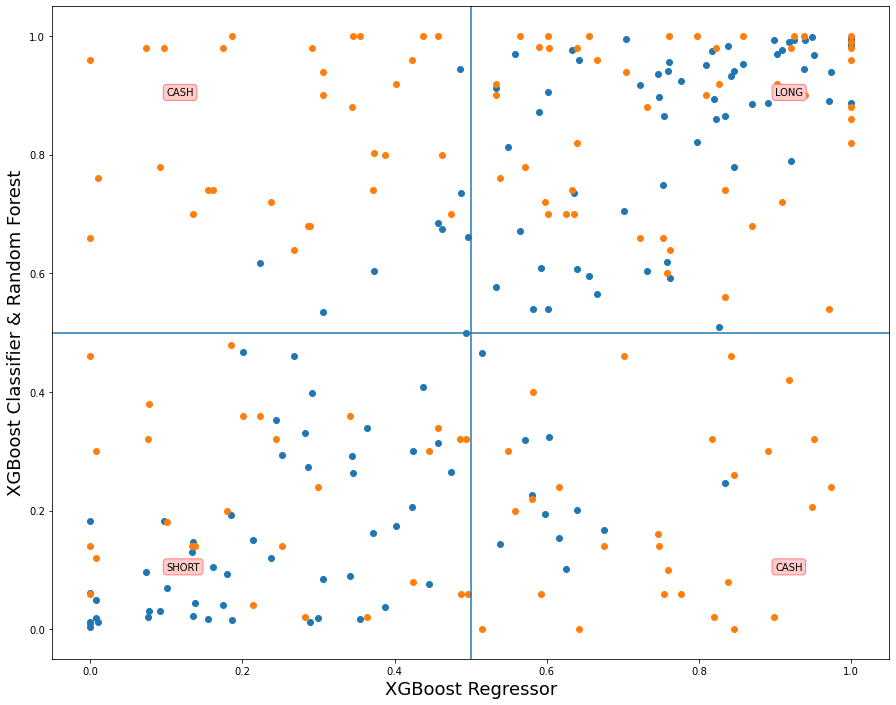

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
plt.scatter(trading_pr_g['xg_gold_r_pr'], trading_pr_g['xg_gold_c_pr'])
plt.scatter(trading_pr_g['xg_gold_r_pr'], trading_pr_g['rf_pr'])
# plt.vlines(0.5,linestyles='solid')
plt.axvline(x=0.5)
plt.axhline(y=0.5)
plt.text(0.9, 0.9, 'LONG', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
plt.text(0.1, 0.1, 'SHORT', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
plt.text(0.1, 0.9, 'CASH', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
plt.text(0.9, 0.1, 'CASH', bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
plt.xlabel("XGBoost Regressor", fontsize=18)
plt.ylabel("XGBoost Classifier & Random Forest", fontsize=18)
plt.savefig('gold.png')
plt.show()